In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

%load_ext autoreload
%autoreload 2
%matplotlib inline

from dstft import DSTFT, FDSTFT

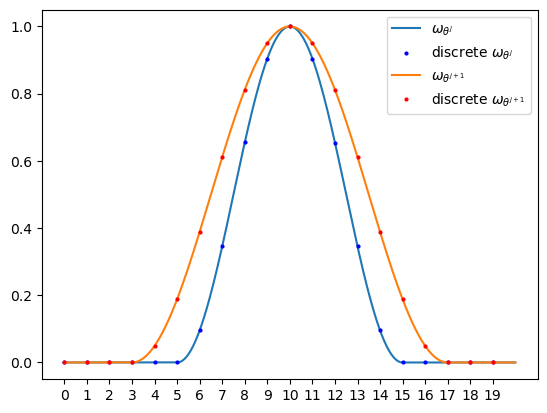

In [76]:
theta = 5_000; N = 10_000; theta2 = 7_000; pas = 500
x = np.arange(N); z = np.arange(0, N, pas)

y = 0.5 - 0.5 * np.cos(2 * pi * (x + (theta-N+1)/2) / theta)
y[ x < (N-1-theta)/2 ] = 0; y[ x > (N-1+theta)/2 ] = 0; 

y2 = 0.5 - 0.5 * np.cos(2 * pi * (x + (theta2-N+1)/2) / theta2)
y2[ x < (N-1-theta2)/2 ] = 0; y2[ x > (N-1+theta2)/2 ] = 0; 

plt.plot(x, y, label='$\omega_{\\theta^{j}}$')
plt.plot(z, y[z], 'o', color='b', markersize=2, label='discrete $\omega_{\\theta^{j}}$')
plt.plot(x, y2, label='$\omega_{\\theta^{j+1}}$')
plt.plot(z, y2[z], 'o', color='r', markersize=2, label='discrete $\omega_{\\theta^{j+1}}$')
plt.xticks(range(0, N, pas), range(20))
plt.legend()

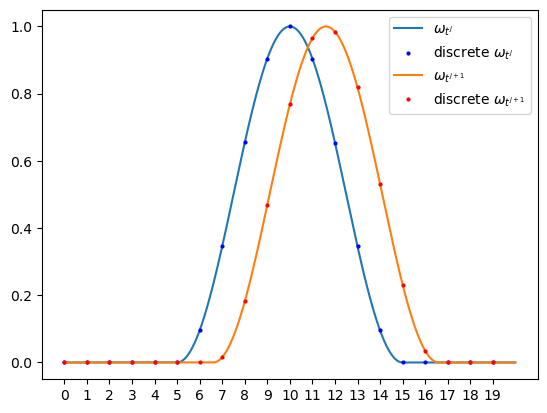

In [77]:
theta = 5_000; N = 10_000; pas = 500
x = np.arange(N); z = np.arange(0, N, pas)

y = 0.5 - 0.5 * np.cos(2 * pi * (x + (theta-N+1)/2) / theta)
y[ x < (N-1-theta)/2 ] = 0; y[ x > (N-1+theta)/2 ] = 0; 

y2 = 0.5 - 0.5 * np.cos(2 * pi * (x - 800 + (theta-N+1)/2) / theta)
y2[ x < (N-1-theta)/2 + 800] = 0; y2[ x > (N-1+theta)/2 + 800] = 0; 

plt.plot(x, y, label='$\omega_{t^{j}}$')
plt.plot(z, y[z], 'o', color='b', markersize=2, label='discrete $\omega_{t^{j}}$')
plt.plot(x, y2, label='$\omega_{t^{j+1}}$')
plt.plot(z, y2[z], 'o', color='r', markersize=2, label='discrete $\omega_{t^{j+1}}$')
plt.xticks(range(0, N, pas), range(20))
plt.legend()

/home/maxime/mambaforge/envs/env/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


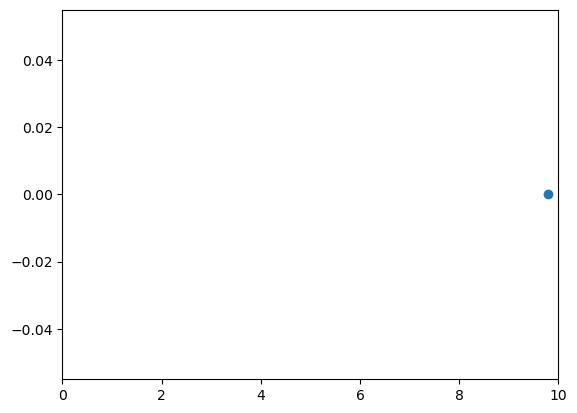

In [61]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim([0, 10])

scat = ax.scatter(1, 0)
x = np.linspace(0, 10)


def animate(i):
    scat.set_offsets((x[i], 0))
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=len(x) - 1, interval=50)

writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

plt.show()